> **Student Names and IDs**:
>
> - Usa Kerdnunvong, 1950448
> - Kyle Gartrell, 2491988
> - Neil Pruthi, 2419654

# Homework 2

## Part 1: Exam-Style Questions

### Problem 1.1

Write the "full" correlation $J = I \ast I$ of the following $2\times 2$ image with itself, using zero padding. Do _not_ normalize.

$$
I = \left[\begin{array}{cc}1 & 2\\0 & 3 \end{array}\right]
$$

### Answer
Padding zeroes and using the right bottom entry as the center in each $J(r,c)$ operation, as below with
$$
I' =
\left[\begin{array}{ccccc}
0 & 0 & 0 & 0 \\
0 & 1 & 2 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 0\end{array} \right]\;
$$

for examples:
$$J(1,1) = 0\times 1 + 0 \times 2 + 0\times 0 + 1 \times 3 = 3 $$
$$J(2,2) = 1\times 1 + 2 \times 2 + 0\times 0 + 3 \times 3 = 14 $$

I get the "full" correlation $J$
$$
J =
\left[\begin{array}{ccc}
3 & 6 & 0 \\
2 & 14 & 2 \\
0 & 6 & 3 \end{array} \right]\;
$$

In [131]:
## Code to check 
import numpy as np
import scipy.signal

I = np.array([[1, 2], [0, 3]])
scipy.signal.correlate2d(I, I, "full")

array([[ 3,  6,  0],
       [ 2, 14,  2],
       [ 0,  6,  3]])

### Problem 1.2

Is the following convolution kernel separable? If so, separate it. If not, prove that it is not.

$$
H = \left[\begin{array}{rrr}2 & 0 & 6\\0 & 1 & 0\\1 & 0 & 3 \end{array}\right]
$$

### Answer
The convolution kernel $H$ is not separable. A convolution kernel $H$ is separable if $rank(H) = 1$. However, as shown below, $rank(H) = 2 \neq 1$. Performing row operations $\frac{1}{2}r_1 - r_3$ to replace $r_3$, and $\frac{1}{2}\times r_1$ to replace $r_1$, I get the reduced row echelon form of $H$
$$
\text{rref}(H) = 
\left[\begin{array}{ccc}
1 & 0 & 3 \\
0 & 1 & 0 \\
0 & 0 & 0 \end{array} \right]\;
$$
Since the rank of a matrix is the number of rows that are non-zero after getting the reduced row echelon form, $rank(H)=2$, which implies that the convolution kernel is not separable.

In [135]:
## Code to check
H = np.array([[2, 0, 6], [0, 1, 0], [1, 0, 3]])
np.linalg.matrix_rank(H)

2

### Problem 1.3

Give expressions for the summation endpoints $s$ and $e$ in the formula for $c_i$ given above. Your expression should be in terms of $n$, $i$, and the $\max$ and/or $\min$ operators (maximum and minimum between two numbers).

### Answer
Trying to write out for $n = 2$, I get

| i | $c_i$ formula                         | $c_{i}$| $s$ | $e$ |
| :--: | :----------------------------------: | :----------: | :--: | :--: |
|-2| $\sum_{j=s}^e a_{-2+j}b_j$       | $a_0b_2$ | 2 | 2|
|-1|$\sum_{j=s}^e a_{-1+j}b_j$        | $a_0b_1+a_1b_2$ | 1 | 2|
|0 |$\sum_{j=s}^e a_{j}b_j$     | $a_0b_0+a_1b_1+a_2b_2$ | 0 | 2|
|1 |$\sum_{j=s}^e a_{1+j}b_j$   | $a_1b_0+a_1b_1+a_2b_2$| 0 | 1|
|2 |$\sum_{j=s}^e a_{-2+j}b_j$  | $a_2b_0$| 0 | 0|

Then, after some guess and check using the $s,i$ from the table above, I get the formulas for $s$ and $e$ as follows:
$$s = \max\{-i,0\}$$
$$e = \min\{n-i,n\}$$

### Problem 1.4

Show that the "full" correlation $a \star b$ as defined in the previous problem does not commute.

### Answer
I will prove by a counterexample, to show that the "full" correlation $a \star b$ as defined in the previous problem does not commute. Consider $n = 2$. Let

$$c = a \star b$$
$$d = b \star a$$

If $a \star b$ commutes, then $c_i = d_i, \forall i\in \{ -n,-n+1, \ldots, -1, 0, 1, \ldots, n\}$. I have

$$c_2 = a_2b_0 $$

as in the example of the homework question. Now I calculate $d_2$ by the definition of $s$ and $e$ defined in Problem 1.3

$$
\begin{array}{rcl}
d_2 & = & \sum_{j=\max\{-i,0\}}^{\min\{n-i,n\}} b_{2+j}a_j \\
    & = & \sum_{j=\max\{-2,0\}}^{\min\{0,2\}} b_{2+j}a_j \\
    & = & \sum_{j=0}^{0} b_{2+j}a_j \\
    & = & b_2a_0 \\
    & \neq & c_2
\end{array} \;
$$

Therefore, $a \star b$ as defined above does not commute. 

### Problem 1.5

Let
$$
c = a \star b \;\;\;\text{and}\;\;\; d = b \star a
$$
be the two "full" correlations between arbitrary, non-empty sequences $a, b$ of equal length $n+1$, as defined above.

Give a general expression for the relationship between $c$ and $d$. Specifically, how does the generic element $c_i$ of $c$ relate to the generic element $d_j$ of $d$?

No proof is necessary.

### Answer
Trying to write out $c$ and $d$ for $n = 2$, I get

| i    | $c_i$                   | $d_i$                   |          
| :--: | :------------:          | :------------:          |
|-2    | $a_0b_2$                | $b_0a_2$                |
|-1    | $a_0b_1+a_1b_2$         | $b_0a_1+b_1a_2$         |
|0     | $a_0b_0+a_1b_1+a_2b_2$  | $b_0a_0+b_1a_1+b_2a_2$  |
|1     | $a_1b_0+a_2b_1$  | $b_1a_0+b_2a_1$         |
|2     | $a_2b_0$                | $b_2a_0$                |

Looking at the table above, since multiplication of real numbers commute, assuming $a_i,b_i \in \mathbb{R}$, $\forall i\in \{ -n,-n+1, \ldots, -1, 0, 1, \ldots, n\}$, I first notice that $c_0 = d_0$. Then, I also see that $c_{-2} = d_2, c_{-1} = d_1, c_1 = d_{-1},$ and $c_2 = d_{-2}$. 

Therefore, I can conclude that $\forall i\in \{ -n,-n+1, \ldots, -1, 0, 1, \ldots, n\}$,

$$c_i = d_{-i}$$

## Part 2: Convolution

### Problem 2.1

Write a function with header

    def convolve(a, b, ctype='same'):

that takes two one-dimensional `numpy` arrays `a` and `b` and an optional convolution type specification `ctype` and returns the convolution of the two arrays as a `numpy` array. Assume that sequence `a` is no shorter than sequence `b`.

The possible values for `ctype` are `'full'`, `'same'` (the default), and `'valid'`. For the last two types, `a` is the signal and `b` is the kernel. For instance, `'same'` means that the output has the same size as `a`.

Show your code and the result of running the given test cases, which compare your implementation to `numpy.convolve`. It is OK if the `dtype` of your output differs from that of `numpy.convolve`.

### Answer

In [1]:
def convolve(a, b, ctype='same'):
    if ctype == 'full':
        J = np.zeros(len(a)+len(b)-1)
        a = np.pad(a, len(b)-1, 'constant', constant_values=0)
    elif ctype == 'valid':
        J = np.zeros(len(a)-len(b)+1)
    else: # ctype == 'same'
        J = np.zeros(len(a))
        a = np.pad(a, int(len(b)/2), 'constant', constant_values=0)
    for i in range(len(J)):
        J[i] = np.sum(np.multiply(b[::-1], a[i:len(b)+i]))
    return J

In [2]:
import numpy as np

signal = np.array([2, 1, -3, 0, 5])
kernel = np.array([2, 0, -1, -2])
ctypes = ('full', 'same', 'valid')

try:
    print('convolve:')
    for ctype in ctypes:
        print(ctype, ': ', convolve(signal, kernel, ctype), sep='')
    print()
    
    print('numpy.convolve:')
    for ctype in ctypes:
        print(ctype, ': ', np.convolve(signal, kernel, ctype), sep='')
    print()
except NameError:
    print('uh-oh')
    pass

convolve:
full: [  4.   2.  -8.  -5.  11.   6.  -5. -10.]
same: [ 2. -8. -5. 11.  6.]
valid: [-5. 11.]

numpy.convolve:
full: [  4   2  -8  -5  11   6  -5 -10]
same: [ 2 -8 -5 11  6]
valid: [-5 11]



### Problem 2.2

Write a function with header

    def convolve2d(I, H):
    
that takes a two-dimensional numerical `numpy` array `I` and a two-dimensional numerical `numpy` array `H`, both non-empty, _and uses_ `np.convolve` (the `numpy` one-dimensional convolution function) to implement the (two-dimensional) convolution of `I` and `H` of style `same`. Do _not_ use any other convolution operators.

Show your code and the result of running the given test cases, which compare your implementation to `scipy.signal.convolve2d` when called with the `'same'` option. It is OK if the `dtype` of your output differs from that of `scipy.signal.convolve2d`.

### Answer

In [5]:
a = np.array([[0, 1], 
              [2, 3]])
J = np.zeros(a.shape)
b = np.pad(a, 1, 'constant', constant_values=0)
b

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 3, 0],
       [0, 0, 0, 0]])

In [133]:
# Your answer here
def convolve2d(I, H):
    
    # dimensions of inputs
    shape_i = I.shape
    shape_h = H.shape
    
    # bounds of summing over vertically 
    neg_hv = -1 * int(np.floor(shape_h[0] / 2))
    pos_hv = shape_h[0] + neg_hv
    
    # result
    result = np.zeros(I.shape)
    
    # calculating convolution
    for x in list(range(shape_i[0])):
        # top 
        if x + neg_hv < 0:
            for y in (list(range(pos_hv + x))):
                result[x] += np.convolve(I[y], H[shape_h[0] - y - pos_hv - 1], 'same')
        # bottom
        elif x + pos_hv - 1 >= shape_i[0]:
            for y in (alist(range(neg_hv + x, x + 1))):
                result[x] += np.convolve(I[y], H[shape_h[0] - y], 'same')
        # middle
        else:
            for y in (list(range(neg_hv + x, x + pos_hv))):
                if shape_h[0] == 1: 
                    result[x] += np.convolve(I[y], H[0], 'same')
                else: 
                    result[x] += np.convolve(I[y], H[shape_h[0] - x - y], 'same')
        
    return result

In [134]:
from scipy import signal as ss
import numpy as np

a = np.array([[10, 11, 12], 
              [20, 21, 22],
              [30, 31, 32]])
hList = (np.array([[1]]), np.array([[1, -2]]), np.array([[2], [-1]]),
         np.array([[2, 3, 5], [4, 0, 1]]), np.array([[2, 3, 5], [4, 0, 1], [1, -1, 2]]))

try:
    for h in hList:
        c = convolve2d(a, h)
        s = ss.convolve2d(a, h, 'same')

        print('----')
        print('convolve2d:', c, sep='\n', end='\n\n')
        print('scipy.signal.convolve2d:', s, sep='\n', end='\n\n')
except NameError:
    pass


----
convolve2d:
[[10. 11. 12.]
 [20. 21. 22.]
 [30. 31. 32.]]

scipy.signal.convolve2d:
[[10 11 12]
 [20 21 22]
 [30 31 32]]

----
convolve2d:
[[ 10.  -9. -10.]
 [ 20. -19. -20.]
 [ 30. -29. -30.]]

scipy.signal.convolve2d:
[[ 10  -9 -10]
 [ 20 -19 -20]
 [ 30 -29 -30]]

----
convolve2d:
[[20. 22. 24.]
 [30. 31. 32.]
 [40. 41. 42.]]

scipy.signal.convolve2d:
[[20 22 24]
 [30 31 32]
 [40 41 42]]

----
convolve2d:
[[ 52. 107.  91.]
 [146. 265. 182.]
 [236. 415. 272.]]

scipy.signal.convolve2d:
[[ 52 107  91]
 [146 265 182]
 [236 415 272]]



## Part 3: Image Differentiation

### Problem 3.1

Implement two functions with headers

    def Gaussian(sigma):
    
and

    def dGaussian(sigma):
    
that return a one-dimensional truncated discrete Gaussian convolution kernel and its derivative (the two kernels $g(x)$ and $d(x)$ from the class notes). Both kernels take the parameter $\sigma$ of the Gaussian as argument. The output of each function should be a `numpy` array (like the one that `scipy.signal.gaussian` returns) that contains the values of the function at integer points of their domain in the interval $[-a, a]$ where $a = \text{ceil}(3.5\sigma)$ (use `math.ceil`). The output kernels should be properly normalized, as explained in the class notes.

Show your code and a plot of each function with $\sigma = 2.3$. No labels are needed, but plot the Gaussian first. Use the `'.-'` line style option.

Remember to use

    %matplotlib inline
    
as you did in homework 1.

### Answer

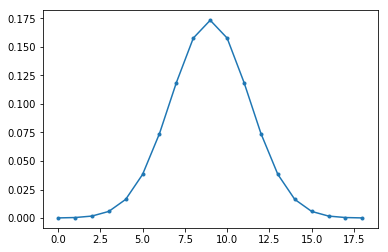

In [25]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

def Gaussian(sigma):
    a = math.ceil(3.5*sigma)
    g = ss.gaussian(2*a + 1, std=sigma)
    g = g / np.sum(g)
    return g

plt.plot(Gaussian(2.3), '.-')
plt.show()

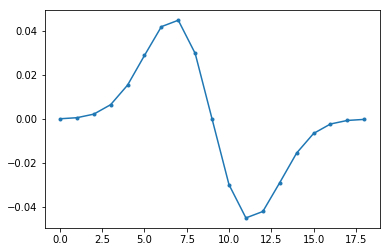

In [127]:
def dGaussian(sigma):
    
    # interval [-a,a] where a = cel(3.5*sigma)
    a = math.ceil(3.5 * sigma)
    
    # calculations of Gaussian
    result = [-i / sigma**2 for i in range(-a, a + 1)] * Gaussian(sigma)
    
    norm = np.linspace(-a,a,2*a + 1).dot(result)
    result = - result / norm
    
    return result

plt.plot(dGaussian(2.3), '.-')
plt.show()

### Problem 3.2

Write a function with header

    def gradient(img, sigma=2.5):
    
that computes the gradient of the black-and-white image `img` (a two-dimensional `numpy` array). Your implementation should use the function `scipy.signal.convolve2d` and the kernel functions you wrote for the previous problem. The result should be a pair (that is, a Python tuple of length 2) of `numpy` arrays, each of the same size as `img`. The first array in the pair should be the derivative in the horizontal direction.

The positive coordinate axes are horizontal to the right and vertical down. Make sure you get the signs of the derivatives right, given this convention.

The function `scipy.signal.convolve2d` takes a 2-dimensional kernel, but you _must_ exploit separability of the differentiation kernels for full credit, so you will be calling this function with kernels that are either $k\times 1$ or $1\times k$ for some $k$.

Show your code, and display the `locomotive.jpg` image (provided) and the two gradient images for it. Use the default value of `sigma`, and use `matplotlib.pyplot.imshow` for display.

### Answer

In [27]:
from skimage import io, color

img = io.imread('locomotive.jpg')

In [116]:
def gradient(img, sigma=2.5):
    horizontal = gradient_convolutions(img, Gaussian(sigma), dGaussian(sigma))
    vertical = gradient_convolutions(img, dGaussian(sigma), Gaussian(sigma))
    return horizontal, vertical

def gradient_convolutions(img, kernel1, kernel2):
    conv1 = ss.convolve2d(img, np.expand_dims(kernel1, axis=1), mode='same')
    conv2 = ss.convolve2d(conv1, np.expand_dims(kernel2, axis=0), mode='same')
    return conv2

In [117]:
locomotive_gradient = gradient(img)

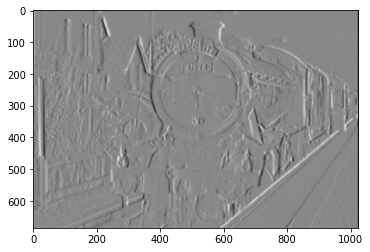

In [119]:
plt.imshow(locomotive_gradient[0], cmap='gray')
plt.show()

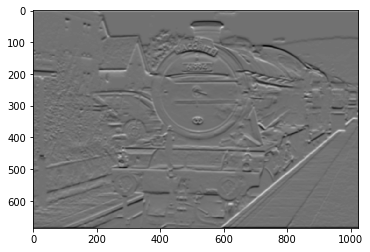

In [120]:
plt.imshow(locomotive_gradient[1], cmap='gray')
plt.show()

### Problem 3.3

Compute and display the magnitude of the gradient for `locomotive.jpg`. Show your code and the output.

### Answer

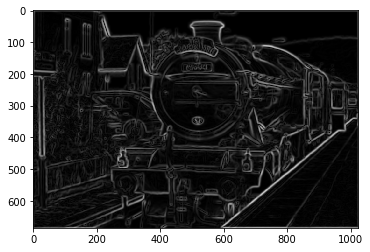

In [125]:
locomotive_gradient_mag = np.sqrt(np.square(locomotive_gradient[0]) + np.square(locomotive_gradient[1]))

plt.imshow(locomotive_gradient_mag, cmap='gray')
plt.show()